In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np



df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataMining/framingham-3.csv");

df = df.dropna()
print(df.shape);
print(df)


# Display the numerical dataset
print(list(df.columns))
print(len(df.columns))







(3656, 16)
      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4231     1   58        3.0              0         0.0     0.0   
4232     1   68        1.0              0         0.0     0.0   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    2

**Perform a cluster analysis via K-means.**

a. What is the optimal number of clusters according to the Elbow method? Justify
your answer.

b. What is the optimal number of clusters according to the Silhouette score? Justify your answer.

c. What is the number of clusters that you propose? Justify your answer.

d. Plot the cluster using the first two principal components. Comment on it.

In [27]:
#only numerious data
print(df[["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]].describe())

               age    education   cigsPerDay      totChol        sysBP  \
count  3656.000000  3656.000000  3656.000000  3656.000000  3656.000000   
mean     49.557440     1.979759     9.022155   236.873085   132.368025   
std       8.561133     1.022657    11.918869    44.096223    22.092444   
min      32.000000     1.000000     0.000000   113.000000    83.500000   
25%      42.000000     1.000000     0.000000   206.000000   117.000000   
50%      49.000000     2.000000     0.000000   234.000000   128.000000   
75%      56.000000     3.000000    20.000000   263.250000   144.000000   
max      70.000000     4.000000    70.000000   600.000000   295.000000   

             diaBP          BMI    heartRate      glucose  
count  3656.000000  3656.000000  3656.000000  3656.000000  
mean     82.912062    25.784185    75.730580    81.856127  
std      11.974825     4.065913    11.982952    23.910128  
min      48.000000    15.540000    44.000000    40.000000  
25%      75.000000    23.080000  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

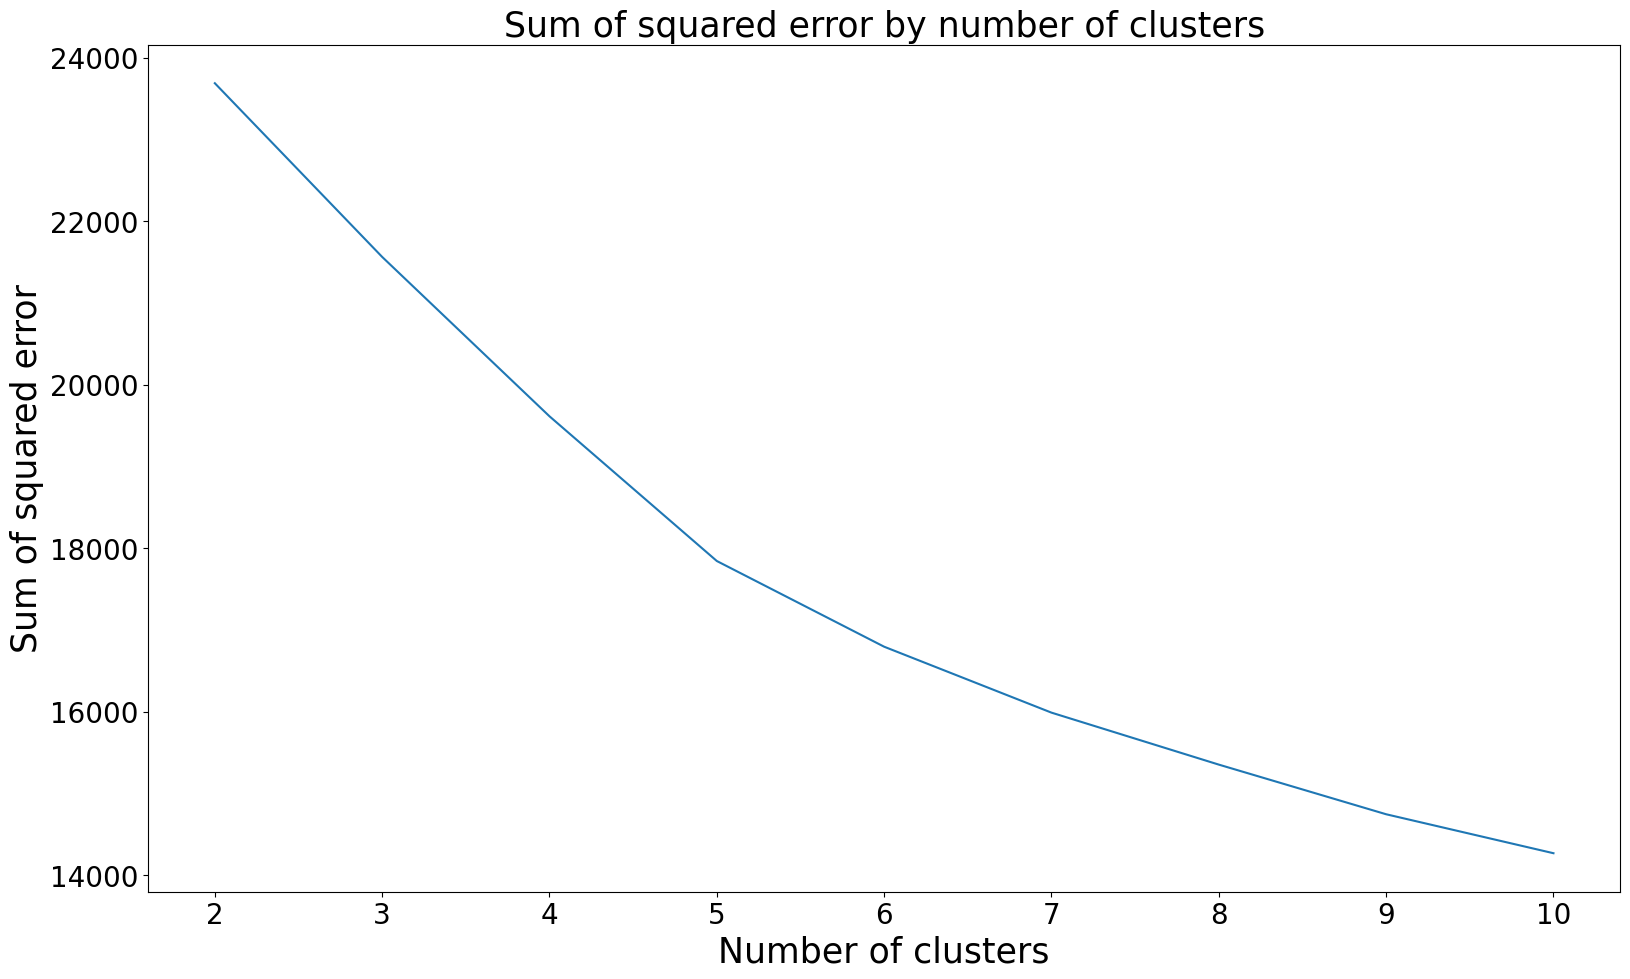

In [28]:
#The SDs are quite different. The data will be standardized.
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,[1,4,9,10,11,12,13,14]];
scaler = StandardScaler(); # creating object
fitted = scaler.fit(X);
X_std = pd.DataFrame(fitted.transform(X));



#Elbow method.
from sklearn.cluster import KMeans
def wcss(x, kmax):
  wcss_s = []
  for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k);
    kmeans.fit(x);
    wcss_s.append(kmeans.inertia_);# sample distances to closest cluster center
  return wcss_s
# Plot
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
kmax = 10; # maximum number of clusters
ax.plot(range(2, kmax + 1), wcss(X_std, kmax));
ax.tick_params(axis="both", which="major", labelsize=20);
ax.set_xlabel("Number of clusters", fontsize = 25);
ax.set_ylabel("Sum of squared error", fontsize = 25);
ax.set_title("Sum of squared error by number of clusters", fontsize = 25);
plt.show();



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

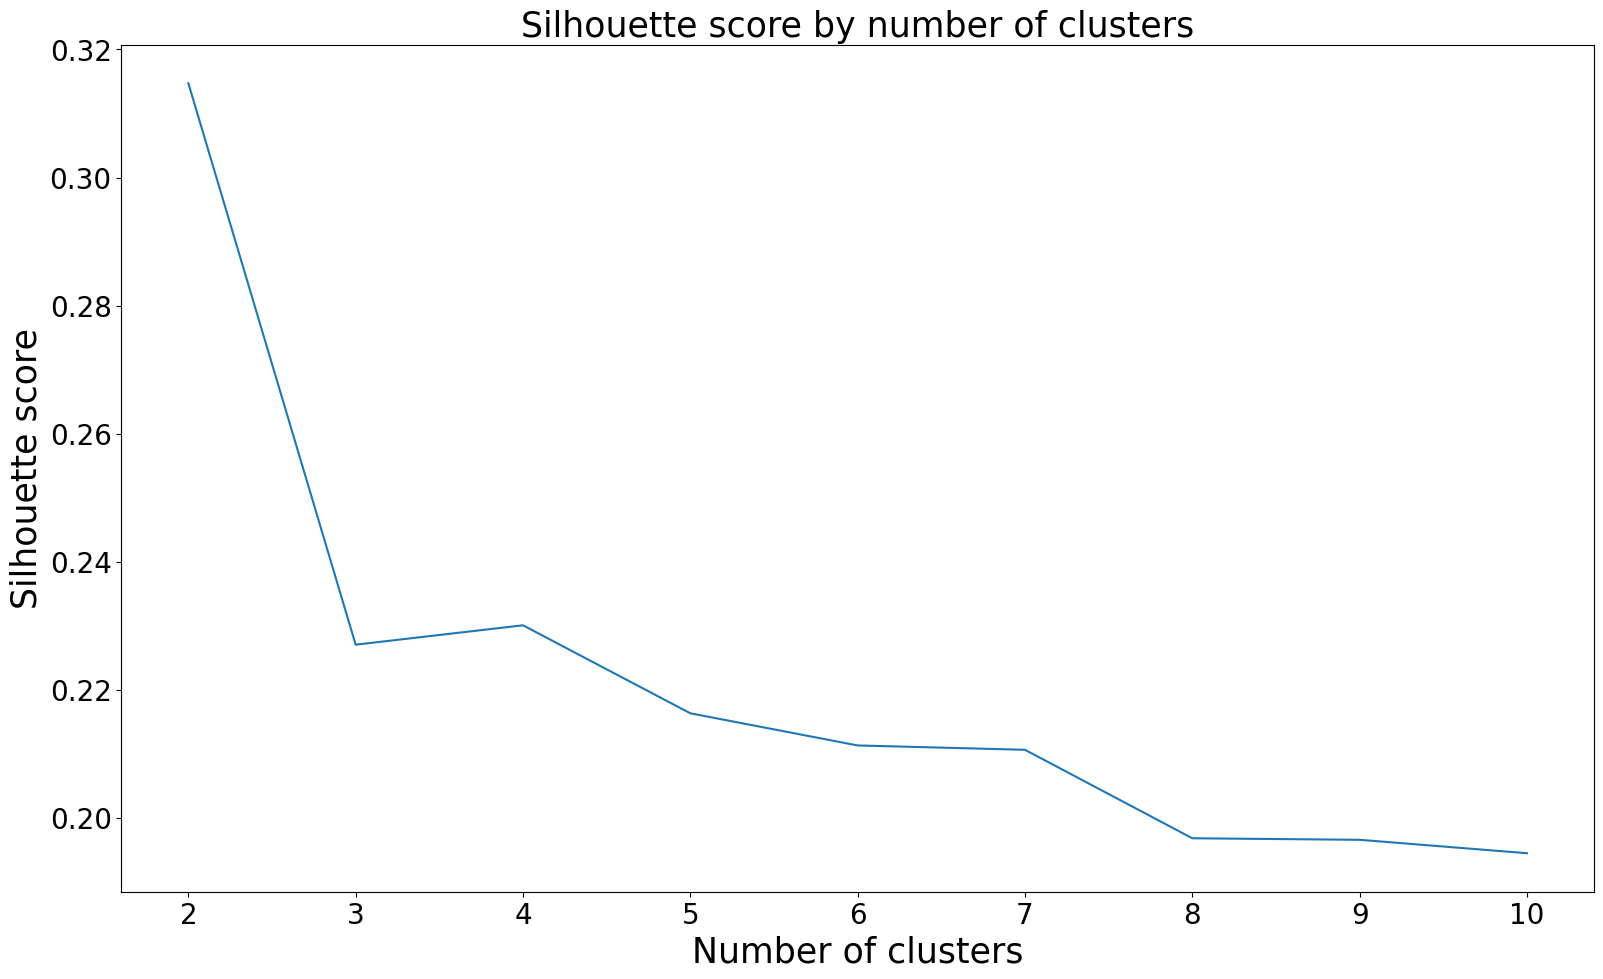

In [16]:
#Silhouette score.
from sklearn.metrics import silhouette_score
def Silhouette(x, kmax):
  sil = []
  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x)
    sil.append(silhouette_score(x, kmeans.labels_, metric = "euclidean"))
  return sil
# Plot
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
ax.plot(range(2,kmax+1), Silhouette(X_std,kmax));
ax.tick_params(axis="both", which="major", labelsize=20);
ax.set_xlabel("Number of clusters", fontsize = 25);
ax.set_ylabel("Silhouette score", fontsize = 25);
ax.set_title("Silhouette score by number of clusters", fontsize = 25);
plt.show();


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


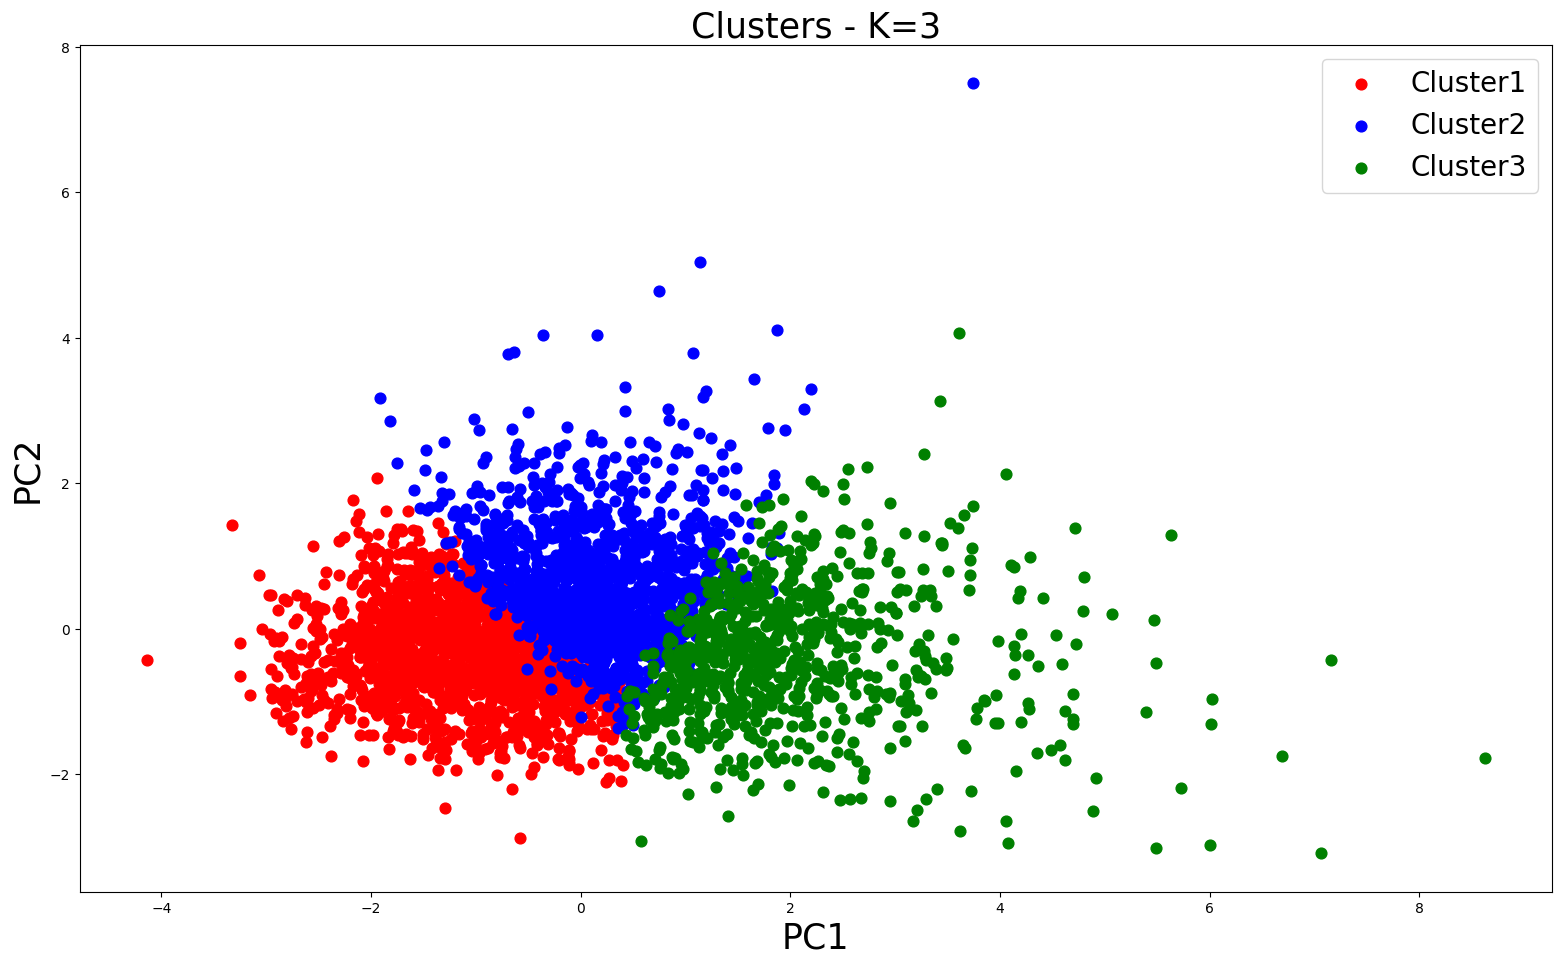

In [17]:
#assess with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2);
principalComponents = pca.fit_transform(X_std);
np.sum(pca.explained_variance_ratio_);
#0.9620015356918279
PCs = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"]);
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42);
y_kmeans = kmeans.fit_predict(X_std);
# Plotting PCs
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
plt.scatter(PCs.iloc[y_kmeans == 0, 0], PCs.iloc[y_kmeans == 0, 1], s=60,
c="red", label = "Cluster1");

plt.scatter(PCs.iloc[y_kmeans == 1, 0], PCs.iloc[y_kmeans == 1, 1], s=60,
c="blue", label = "Cluster2");

plt.scatter(PCs.iloc[y_kmeans == 2, 0], PCs.iloc[y_kmeans == 2, 1], s=60,
c="green", label = "Cluster3");

plt.xlabel("PC1", fontsize = 25);
plt.ylabel("PC2", fontsize = 25);
ax.set_title("Clusters - K=3", fontsize = 25);
plt.legend(fontsize = 20);
plt.show();


2. Now we will evaluate the K-means method, an unsupervised machine learning technique, taking advantage of the information we have in the data set. We will evaluate how good this method is at predicting the 10 year risk of coronary heart disease CHD . Note that the K-mean method does not require this variable.

a. Equate the number of 0s and 1s through the oversampling technique.



In [22]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
import statsmodels.api as sm;
import scipy;
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [44]:

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataMining/framingham-3.csv");

df = df.dropna()

frequency_table = df["TenYearCHD"].value_counts();
print(frequency_table);


0    3099
1     557
Name: TenYearCHD, dtype: int64


In [45]:
# Oversampling
df_minority = df[(df['TenYearCHD']==1)];
df_majority = df[(df['TenYearCHD']==0)];
df_minority_upsampled = resample(df_minority,  replace=True,  n_samples= frequency_table[0],random_state=123);  # reproducible results

df_minority_upsampled.reset_index(drop=True, inplace=True); # reseting row numbers

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority]);
response_count = df_upsampled.groupby("TenYearCHD")["TenYearCHD"].count();
print(response_count);


#The SDs are quite different. The data will be standardized.
from sklearn.preprocessing import StandardScaler
X2 = df_upsampled.iloc[:,[1,4,9,10,11,12,13,14]];
scaler = StandardScaler(); # creating object
fitted = scaler.fit(X2);
X_std2 = pd.DataFrame(fitted.transform(X2));





TenYearCHD
0    3099
1    3099
Name: TenYearCHD, dtype: int64


b. Perform a cluster analysis using K=2.

c. Plot the clusters using the first 2 principal components. Comment on it.

d. Identify the cluster that represents TenYearCHD= 0 and 1.

e. Using the clusters defined above as a prediction method. Calculate accuracy,
sensitivity, and specificity. Comment on it

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


           PC1       PC2
0    -0.356642 -0.398963
1     1.155171 -1.189969
2     4.494347  3.311992
3    -0.025870  1.934111
4     0.195204  1.040187
...        ...       ...
6193 -0.820234  1.239239
6194  5.812805  0.725643
6195 -0.069051 -0.665605
6196 -1.766798  1.148287
6197 -0.058258 -0.492953

[6198 rows x 2 columns]


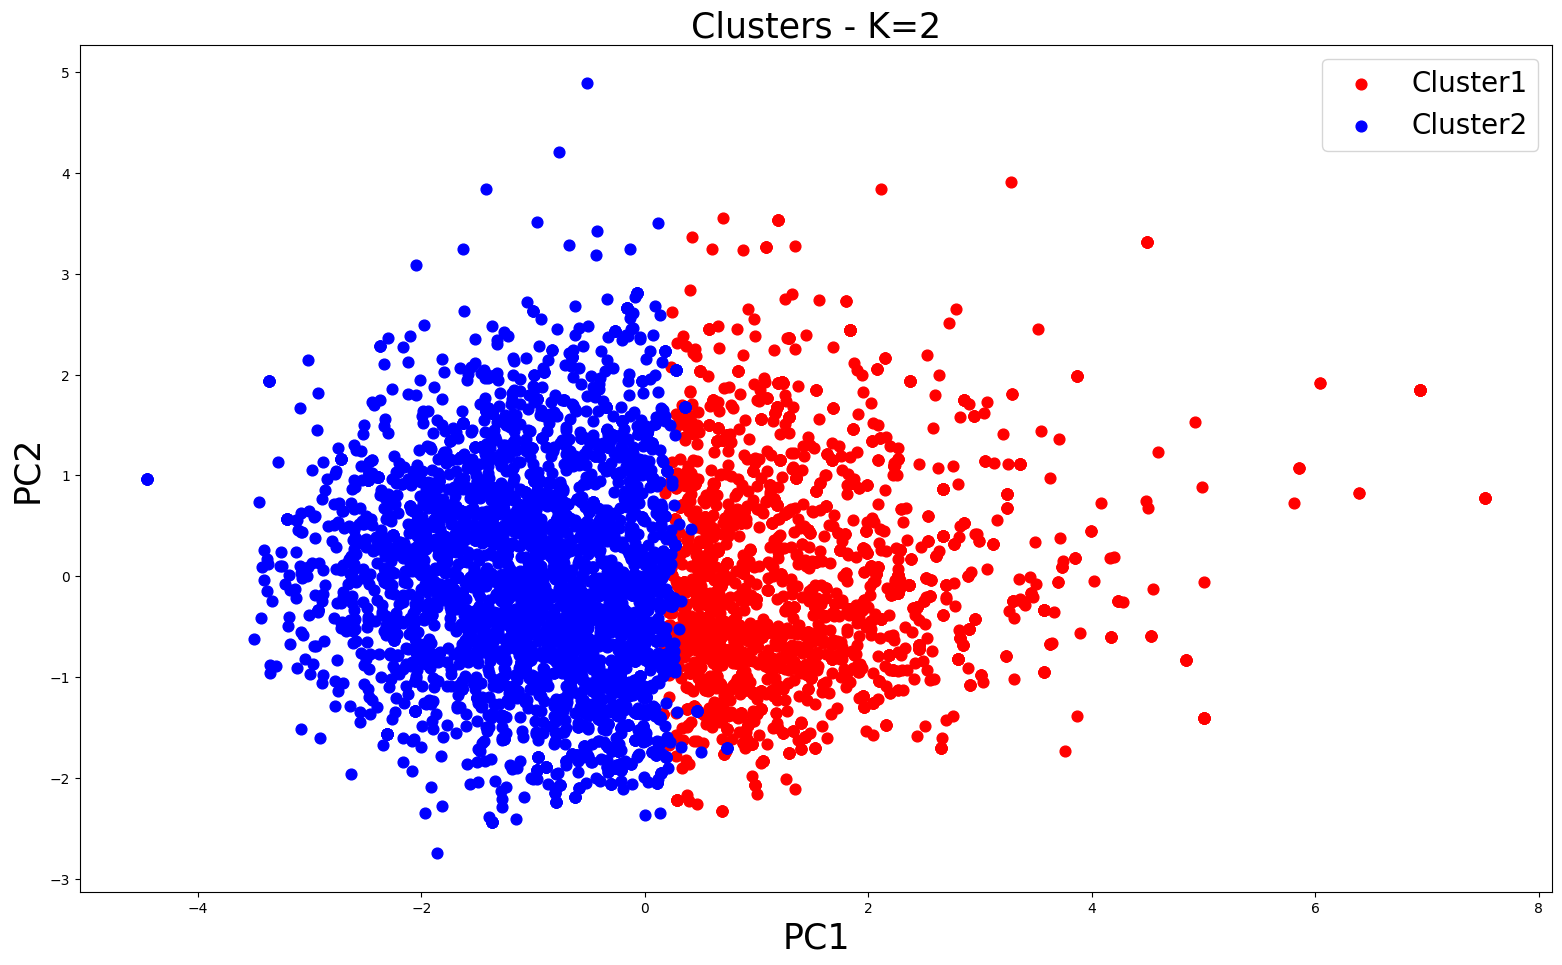

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2);
principalComponents = pca.fit_transform(X_std2);
np.sum(pca.explained_variance_ratio_);
#0.9620015356918279
PCs = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"]);
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 42);
y_kmeans = kmeans.fit_predict(X_std2);
print(PCs)
# Plotting PCs
fig = plt.figure(figsize = (19,11));
ax = fig.add_subplot(1,1,1);
plt.scatter(PCs.iloc[y_kmeans == 0, 0], PCs.iloc[y_kmeans == 0, 1], s=60,
c="red", label = "Cluster1");

plt.scatter(PCs.iloc[y_kmeans == 1, 0], PCs.iloc[y_kmeans == 1, 1], s=60,
c="blue", label = "Cluster2");


plt.xlabel("PC1", fontsize = 25);
plt.ylabel("PC2", fontsize = 25);
ax.set_title("Clusters - K=2", fontsize = 25);
plt.legend(fontsize = 20);
plt.show();

In [ ]:
#e. Using the clusters defined above as a prediction method. Calculate accuracy, sensitivity, and specificity. Comment on it


X = df_upsampled.iloc[:, :-1];
y = df_upsampled['TenYearCHD'];

# Here we define training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,shuffle=True);

aux = pd.concat([X_train, y_train], axis = 1);

model  = sm.GLM.from_formula("TenYearCHD ~ C(male) + age + education + C(currentSmoker) + \
                             cigsPerDay + C(BPMeds) + C(prevalentStroke) + C(prevalentHyp) + C(diabetes) + \
                             totChol + sysBP + diaBP + BMI + heartRate+ glucose", family = sm.families.Binomial(),
                             data=aux);
result = model.fit();
print(result.summary());

### Checking Overdispersion ###

# Since there are many continuous predictors, it is highly likely that the responses are ungrouped,
# in which case the overdispersion cannot occur.
# But we will check it anyway.

dev = result.deviance; # Residual Deviance
dof = result.df_resid; # Degree of freedoms of Residuals
pvalue = 1 - scipy.stats.chi2.cdf(dev, dof); # p-value

# H0: Logistic regression model provides an adequate fit for the data
# H1: Logistic regression model does not provide an adequate fit for the data

if pvalue < 0.05:
    print("Saturated model -- p-value: ", pvalue);
else :
    print("Logistic model is ok -- p-value=", pvalue);

# Rules of thumb

# Calculation of Pearson chi2 / n - (p+1)
print("Pearson2 / Df", result.pearson_chi2 / result.df_resid);
# This value is close to 1.  So the model provides an adequate fit for the data

### Predictions ###
predictions = result.predict(X_test);
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions];

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predictions_nominal)
print("Confusion matrix: ", cm);
# The diagonal elements of the confusion matrix indicate correct predictions,
#  while the off-diagonals represent incorrect predictions

# The logistic regression correctly predicted the 10 year risk of coronary heart disease 68.87% of the times
print("Accuracy: ", round(np.sum(np.diagonal(cm))/np.sum(cm),3));

# The model correctly predicted 67.7% of the times those with a 10 year risk of coronary heart disease
print("Sensitivity: ", round(cm[1,1]/np.sum(cm[1,:]),3));

# The model correctly predicted 70.7% of the times those without a 10 year risk of coronary heart disease
print("Specificity: ", round(cm[0,0]/np.sum(cm[0,:]),3));

# We can also get those values as follows
print(classification_report(y_test,
                            predictions_nominal,
                            digits = 3))

